**Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)


y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

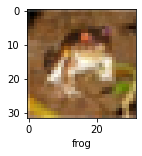

In [11]:
plot_sample(X_train, y_train, 0)

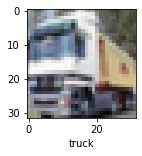

In [12]:
plot_sample(X_train, y_train, 1)

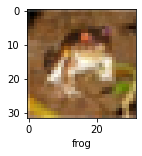

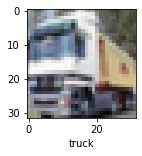

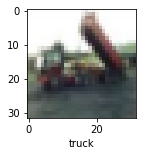

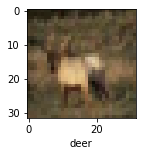

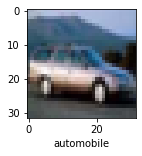

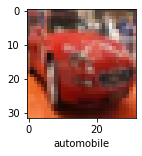

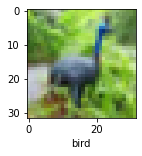

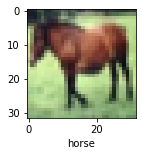

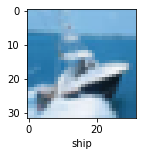

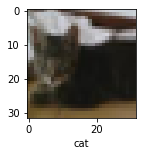

In [13]:
for i in range(10):
  plot_sample(X_train, y_train, i)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [14]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

**Normalizing the training data**

In [15]:
X_train=X_train/255
X_test=X_test/255

**Build simple artificial neural network for image classification**

In [16]:
ann=models.Sequential([
                      layers.Flatten(input_shape=(32,32,3)),
                      layers.Dense(3000,activation='relu'),
                      layers.Dense(1000,activation='relu'),
                      layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 78s 49ms/step - loss: 1.8100 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.6226 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5384 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4821 - accuracy: 0.4751
Epoch 5/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4303 - accuracy: 0.4986


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.56      0.57      1000
           1       0.40      0.83      0.54      1000
           2       0.47      0.23      0.31      1000
           3       0.27      0.53      0.36      1000
           4       0.42      0.41      0.42      1000
           5       0.41      0.34      0.37      1000
           6       0.65      0.31      0.42      1000
           7       0.52      0.56      0.54      1000
           8       0.75      0.42      0.54      1000
           9       0.58      0.35      0.44      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.45     10000
weighted avg       0.51      0.45      0.45     10000



**Now let us build a convolutional neural network to train our images**

In [18]:
cnn=models.Sequential([
                       #cnn
                      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                      layers.MaxPool2D((2,2)),
                       
                      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                      layers.MaxPool2D((2,2)),


                      layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(10,activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4820 - accuracy: 0.4650
Epoch 2/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1216 - accuracy: 0.6042
Epoch 3/15
 628/1563 [===========>..................] - ETA: 22s - loss: 1.0136 - accuracy: 0.6457

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
plot_sample(X_test, y_test,10)

In [ ]:
classes[y_classes[10]]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))